In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import seaborn as sns


In [2]:
data = pd.read_csv("/Users/rayan/Desktop/project ML/diabetes.csv")
print(data.shape)

(768, 9)


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

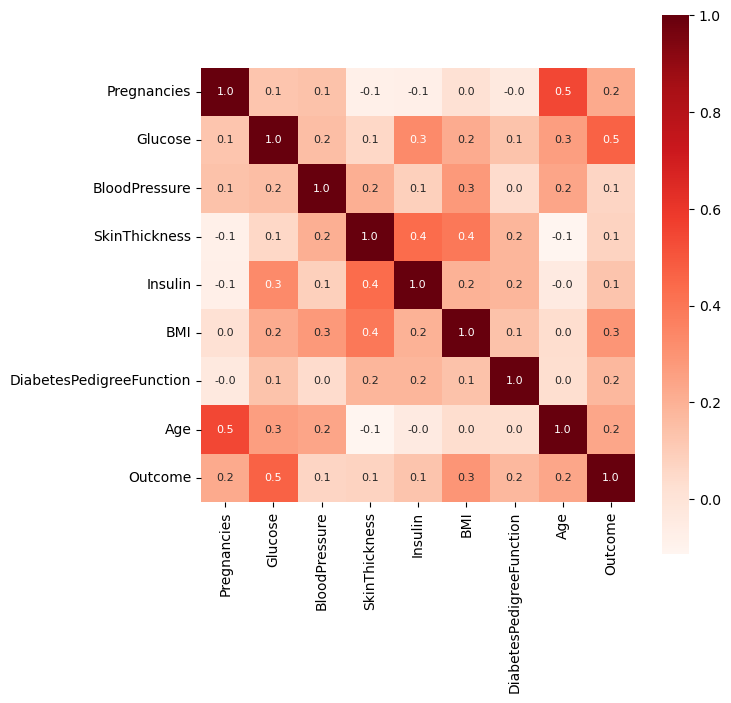

In [4]:
correlation = data.corr()
# constructing a heatmap to understand the correlation
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [33]:
X = data.drop("Outcome", axis=1)  # Assuming "Outcome" is the target column
y = data["Outcome"]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
num_features_to_select = 5  
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [23]:
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC()

In [24]:
rf_model.fit(X_train_selected, y_train)
dt_model.fit(X_train_selected, y_train)
knn_model.fit(X_train_selected, y_train)
nb_model.fit(X_train_selected, y_train)
lr_model.fit(X_train_selected, y_train)
svm_model.fit(X_train_selected, y_train)

SVC()

In [25]:
rf_pred = rf_model.predict(X_test_selected)
dt_pred = dt_model.predict(X_test_selected)
knn_pred = knn_model.predict(X_test_selected)
nb_pred = nb_model.predict(X_test_selected)
lr_pred = lr_model.predict(X_test_selected)
svm_pred = svm_model.predict(X_test_selected)

In [26]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf=confusion_matrix(y_test, rf_pred)          #Measuring Accuracy using Confusion Matrix and Accuracy Function
##########################################

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_conf=confusion_matrix(y_test, dt_pred)
##########################################

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_conf=confusion_matrix(y_test, knn_pred)
##########################################

nb_accuracy = accuracy_score(y_test, nb_pred)
nb_conf=confusion_matrix(y_test, nb_pred)
##########################################

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_conf=confusion_matrix(y_test, lr_pred)
##########################################

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_conf=confusion_matrix(y_test, svm_pred)

In [31]:
print("Random Forest Accuracy:", rf_accuracy ,"\n Confusion Matrix: \n",rf_conf)

print("Decision Tree Accuracy:", dt_accuracy,"\n Confusion Matrix: \n",dt_conf)
print("K-Nearest Neighbors Accuracy:", knn_accuracy,"\n Confusion Matrix: \n",knn_conf)
print("Naive Bayes Accuracy:", nb_accuracy,"\n Confusion Matrix: \n",nb_conf)
print("Logistic Regression Accuracy:", lr_accuracy,"\n Confusion Matrix: \n",lr_conf)
print("Support Vector Machine Accuracy:", svm_accuracy,"\n Confusion Matrix: \n",svm_conf)

Random Forest Accuracy: 0.7727272727272727 
 Confusion Matrix: 
 [[80 19]
 [16 39]]
Decision Tree Accuracy: 0.7077922077922078 
 Confusion Matrix: 
 [[72 27]
 [18 37]]
K-Nearest Neighbors Accuracy: 0.7337662337662337 
 Confusion Matrix: 
 [[76 23]
 [18 37]]
Naive Bayes Accuracy: 0.7532467532467533 
 Confusion Matrix: 
 [[79 20]
 [18 37]]
Logistic Regression Accuracy: 0.7532467532467533 
 Confusion Matrix: 
 [[81 18]
 [20 35]]
Support Vector Machine Accuracy: 0.7662337662337663 
 Confusion Matrix: 
 [[82 17]
 [19 36]]


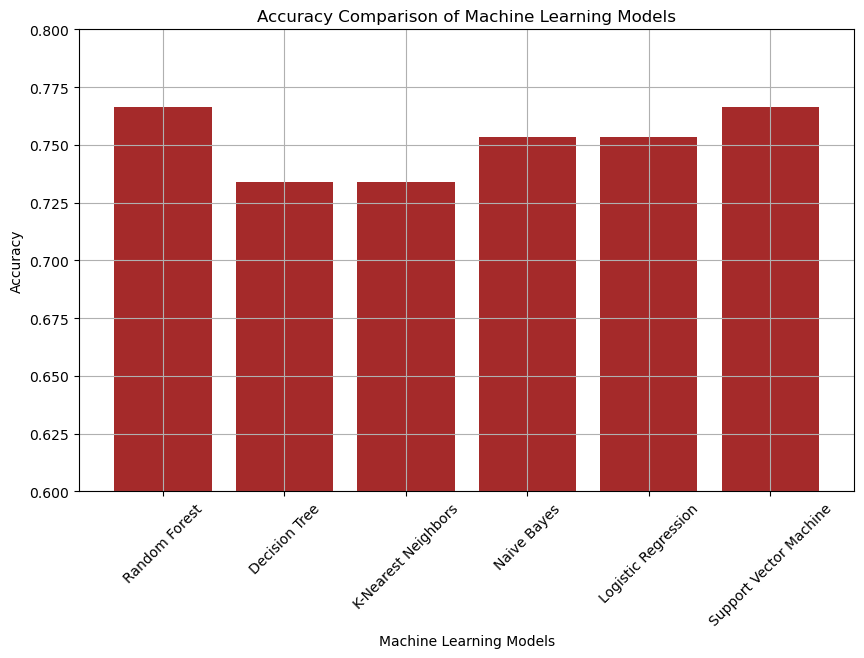

In [13]:
# List of model names for the x-axis
model_names = ["Random Forest", "Decision Tree", "K-Nearest Neighbors", "Naive Bayes", "Logistic Regression", "Support Vector Machine"]
# List of accuracy scores for the y-axis
accuracy_scores = [rf_accuracy, dt_accuracy, knn_accuracy, nb_accuracy, lr_accuracy, svm_accuracy]
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='brown')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.ylim(0.6, 0.8)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()
plt.show()